In [1]:
from keras.models import load_model
import cv2, sys
from imutils.video import VideoStream
import numpy as np
from keras.applications.mobilenet_v2 import preprocess_input
from keras.preprocessing.image import img_to_array, load_img

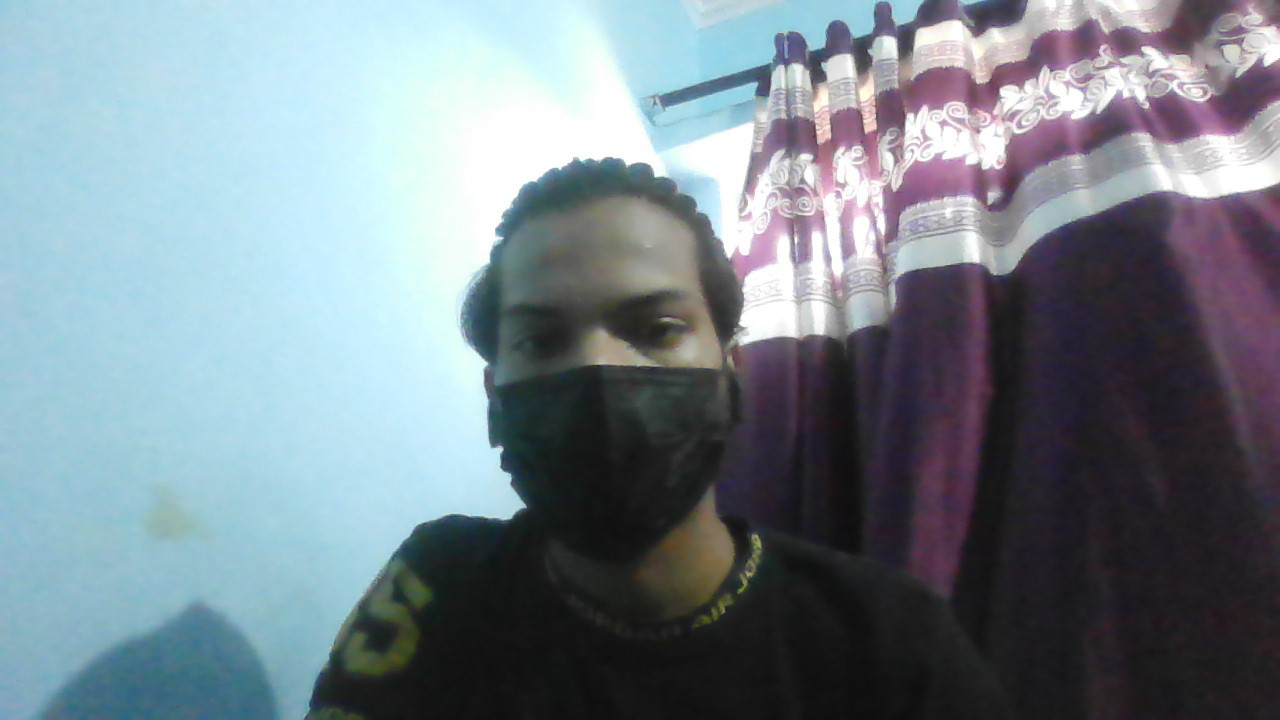

In [2]:
img = load_img("C:/Users/Ankit/OneDrive/Pictures/Camera Roll/WIN_20230718_12_15_17_Pro.jpg")

img

In [3]:
img = img_to_array(img)
img.shape

(720, 1280, 3)

In [4]:
# Mask Detector Model
Mask_Model = load_model('C:/pwskills_python_codes/Face_Mask_Detection/artifacts/Mask_detection_model.h5')
# Face detector models
prototxt = r"C:/pwskills_python_codes/Face_Mask_Detection/artifacts/FaceModels/deploy.prototxt"
weights = r"C:/pwskills_python_codes/Face_Mask_Detection/artifacts/FaceModels/res10_300x300_ssd_iter_140000.caffemodel"
Face_Model = cv2.dnn.readNet(prototxt, weights)

In [5]:
h,w = img.shape[:2]

In [6]:
blob = cv2.dnn.blobFromImage(image=img, 
									scalefactor=1.0, 
									size=(224, 224), 
									mean=(104.0, 177.0, 123.0)) # 4d blob

In [7]:
Face_Model.setInput(blob)
detections = Face_Model.forward()

In [8]:
faces = []
locs = []
preds = []
for i in range(detections.shape[2]):
    prob = detections[0, 0, i, 2]
    if prob > 0.5:  # thresh for face
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (X_start, y_start, X_end, y_end) = box.astype("int")
        (X_start, y_start) = (max(0, X_start), max(0, y_start))
        (X_end, y_end) = (min(w - 1, X_end), min(h - 1, y_end))
        face = img[y_start:y_end, X_start:X_end]
        face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
        face = cv2.resize(face, (224, 224))
        face = img_to_array(face)
        face = preprocess_input(face)
        faces.append(face)
        locs.append((X_start, y_start, X_end, y_end))
if len(faces) > 0:  # if faces
    faces = np.array(faces, dtype="float32")
    preds = Mask_Model.predict(faces, batch_size=32)


1/1 [==============================] - 0s 49ms/step


In [9]:
for box, pred in zip(locs, preds):
	X_start, y_start, X_end, y_end = box
	mask, withoutMask = pred
	if mask > withoutMask:
		label = "Mask"
		color = (0, 255, 0)
	else:
		label = "No Mask"
		color = (0, 0, 255)
	label = f"{label}, {format(max(mask, withoutMask) * 100, '.2f')}%"
	print(label)

Mask, 99.85%
